In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file
df = pd.read_csv("C:/Users/UL494YB/OneDrive - EY/Desktop/Grad School/Machine Learning/Group Project/books_dataset.csv")
#Reading the first five records
df.head()

,User_ID,Age,Location,City,State,Country,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating
0,2,18,"stockton, california, usa",stockton,california,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,11400,49,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
2,67544,30,"toronto, ontario, canada",toronto,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
3,85526,36,"victoria, british columbia, canada",victoria,british columbia,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
4,96054,29,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [3]:
print(df.shape)
print(list(df.columns))

(753298, 12)
['User_ID', 'Age', 'Location', 'City', 'State', 'Country', 'ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Book_Rating']


In [4]:
df['Country'].value_counts()

 usa                         552559
 canada                       65383
 united kingdom               25801
 germany                      19636
 australia                    14022
                              ...  
 granada, spain                   1
 mexico"                          1
 new zealand, new zealand         1
 hernando                         1
 mozambique                       1
Name: Country, Length: 330, dtype: int64

In [5]:
df=df[df['Location'].str.contains("usa|canada|united kingdom|germany|australia")]

In [6]:
print(df.shape)
df.head()

(679896, 12)


,User_ID,Age,Location,City,State,Country,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating
0,2,18,"stockton, california, usa",stockton,california,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,11400,49,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
2,67544,30,"toronto, ontario, canada",toronto,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
3,85526,36,"victoria, british columbia, canada",victoria,british columbia,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
4,96054,29,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [7]:
df=df.dropna()
df.shape

(677917, 12)

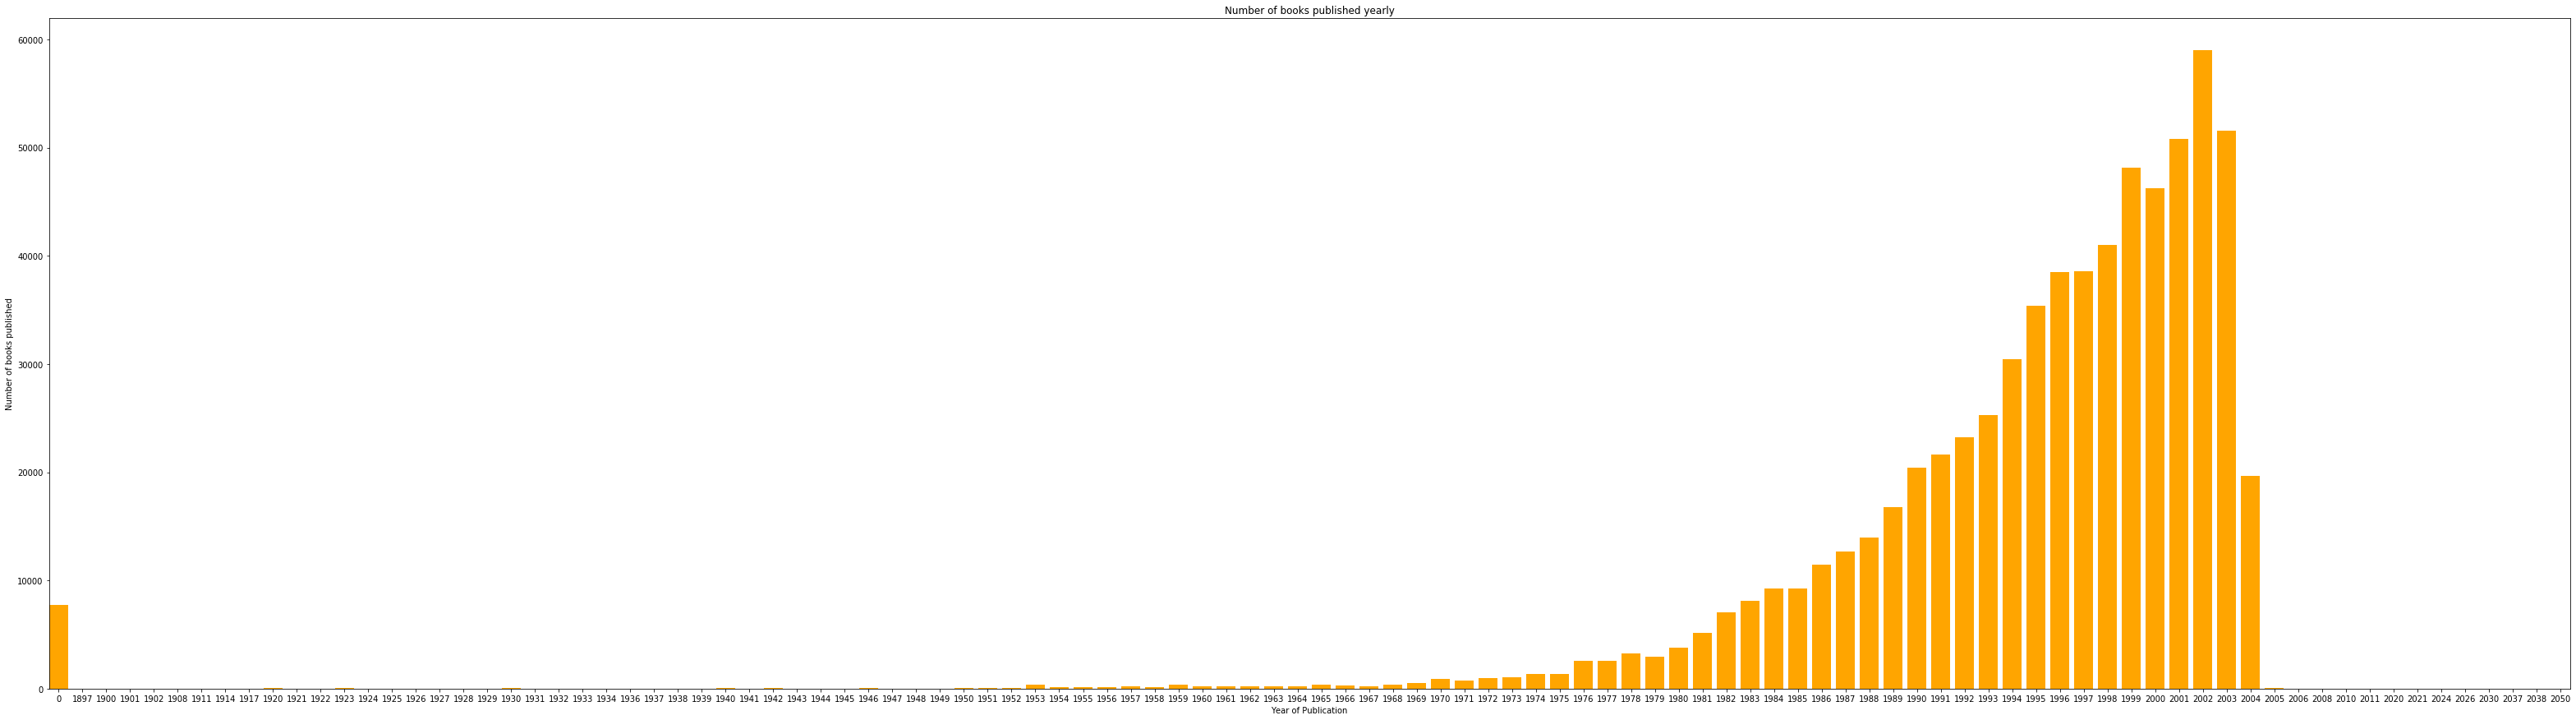

In [8]:
publications = {}
for year in df['Year_Of_Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'orange')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [9]:
df['Year_Of_Publication'].value_counts()

2002    55815
2003    48941
2001    47535
1999    44367
2000    42713
        ...  
1933        1
1934        1
2010        1
1930        1
1928        1
Name: Year_Of_Publication, Length: 189, dtype: int64

In [10]:
df['Year_Of_Publication'].astype(int)

0         2002
1         2001
2         2001
3         2001
4         2001
          ... 
753293    1988
753294    1991
753295    2004
753296    1996
753297    2000
Name: Year_Of_Publication, Length: 677917, dtype: int32

In [11]:
#Select into the year in 20th century and drop duplicates
df_model1=df[df['Year_Of_Publication'].astype(int)>1999].drop_duplicates(subset=('ISBN'))
df_model1.shape

(55759, 12)

In [12]:
#Select into the year in 20th century for model 2
df_model2=df[df['Year_Of_Publication'].astype(int)>1999]
df_model2.shape

(227451, 12)

In [13]:
print(df_model2.shape)
df_model2.head(5)

(227451, 12)


,User_ID,Age,Location,City,State,Country,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating
0,2,18,"stockton, california, usa",stockton,california,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,11400,49,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
2,67544,30,"toronto, ontario, canada",toronto,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
3,85526,36,"victoria, british columbia, canada",victoria,british columbia,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
4,96054,29,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [14]:
df_model2['Country'].value_counts()

 usa                                186969
 canada                              18882
 united kingdom                       8451
 germany                              8274
 australia                            4082
 england, united kingdom               362
 new york, georgia, usa                 79
 new york, usa                          70
 cambridgeshire, united kingdom         61
 maryland, usa                          36
 switzerland                            33
 florida, usa                           21
 ,                                      17
 oregon, usa                            10
 illinois, usa                          10
 michigan, usa                           9
 west yorkshire, united kingdom          9
 virginia, usa                           8
 british columbia, canada                7
 dc, usa                                 6
 tennessee, usa                          5
 texas, usa                              4
 california, usa                         4
 tn, usa   

In [15]:
df_model2.dtypes

User_ID                 int64
Age                     int64
Location               object
City                   object
State                  object
Country                object
ISBN                   object
Book_Title             object
Book_Author            object
Year_Of_Publication    object
Publisher              object
Book_Rating             int64
dtype: object

EDA

In [16]:
#Top 10 Highest Rated Books 
data = df_model2.groupby('ISBN').agg(['mean', 'count'])['Book_Rating'].reset_index()

# generate score based on mean rating and total number of times the book is rated
m = data['count'].quantile(0.99) # minimum votes required to be listed in the Top 
data = data[data['count']>m]
R = data['mean'] # average for the book (mean) = (Rating)
v = data['count'] # number of votes for the book = (votes)
C = data['mean'].mean() # mean vote across all books
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)

# get title of books
data= pd.merge(data, df_model2, on='ISBN')[['Book_Title', 'Book_Author', 'mean', 'count', 'weighted rating', 
                              'Year_Of_Publication']].drop_duplicates('Book_Title').iloc[:10]
data

,Book_Title,Book_Author,mean,count,weighted rating,Year_Of_Publication
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.696970,132,5.738322,2000
132,Free,Paul Vincent,8.081633,49,5.614962,2003
181,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.850000,240,5.389585,2003
421,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,5.403974,151,4.839702,2001
694,The Lord of the Rings (Movie Art Cover),J.R.R. Tolkien,5.846154,52,4.504300,2001
746,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,4.761702,235,4.471250,2000
981,The Da Vinci Code,Dan Brown,4.572816,618,4.462984,2003
1599,The Five People You Meet in Heaven,Mitch Albom,4.536443,343,4.353268,2003
1942,The Secret Life of Bees,Sue Monk Kidd,5.446429,56,4.337464,2002
1998,"Rich Dad, Poor Dad: What the Rich Teach Their ...",Robert T. Kiyosaki,5.574468,47,4.294853,2000


In [17]:
#Top 10 Highest Rated Authors 
# drop any duplicates in df
df1= df_model2.drop_duplicates(['Book_Author', 'Book_Title'])

# get book-author and title from df_new
data_authors = df1.groupby('Book_Author').agg(['mean', 'count'])['Book_Rating'].reset_index()

# generate score based on man rating and total number of times the author is rated
m = data_authors ['count'].quantile(0.99) # minimum votes required to be listed in the Top 
data = data_authors[data_authors['count']>m]
print('m =', m)
print(data_authors .shape)
R = data_authors['mean'] # average for the author (mean) = (Rating)
v = data_authors['count'] # number of votes for the author = (votes)
C = data_authors['mean'].mean() # mean vote across all authors
data_authors ['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data_authors_top= data_authors.sort_values('weighted rating', ascending=False).reset_index(drop=True)

data_authors_top.iloc[:10]

m = 13.0
(27763, 3)


,Book_Author,mean,count,weighted rating
0,Michiro Ueyama,10.000000,10,6.306820
1,Clamp,7.000000,41,6.149201
2,Simon Furman,9.777778,9,6.048039
3,Tony Abbott,7.454545,22,5.973053
4,Fuyumi Soryo,8.900000,10,5.828559
5,Miss Read,8.333333,12,5.802275
6,Terri Farley,8.777778,9,5.638949
7,Rumiko Takahashi,7.466667,15,5.609174
8,Sara Douglass,7.916667,12,5.602275
9,John Steinbeck,6.782609,23,5.584913


Method 1: Content Based Recommendation - Only Based On Book Title

In [18]:
print(list(df_model1.columns))

['User_ID', 'Age', 'Location', 'City', 'State', 'Country', 'ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Book_Rating']


In [19]:
df_model1['Book_Title'].value_counts()

Phonics Fun: Reading Program, Pack 4 (Clifford the Big Red Dog)    12
The Wedding                                                         9
The Amber Spyglass (His Dark Materials, Book 3)                     7
Mystic River                                                        6
The Protector                                                       6
                                                                   ..
She is Me: A Novel                                                  1
The Wyvern Mystery                                                  1
The Billionaire Drifter (Family Secrets)                            1
The Hypochondriac's Guide to Life. And Death.                       1
The Powers of Thought                                               1
Name: Book_Title, Length: 51857, dtype: int64

In [20]:
df_model1.reset_index(inplace = True)

In [21]:
df_model1.head(5)

,index,User_ID,Age,Location,City,State,Country,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating
0,0,2,18,"stockton, california, usa",stockton,california,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,1,11400,49,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
2,35,52614,33,"toccoa, ga., usa",toccoa,ga.,usa,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,8
3,492,64632,19,"danville, california, usa",danville,california,usa,1879384493,If I'd Known Then What I Know Now: Why Not Lea...,J. R. Parrish,2003,Cypress House,0
4,494,198711,62,"little canada, minnesota, usa",little canada,minnesota,usa,0061076031,Mary-Kate &amp; Ashley Switching Goals (Mary-K...,Mary-Kate &amp; Ashley Olsen,2000,HarperEntertainment,0


In [22]:
# #TfidfVectorizer transforms text to feature vectors that can be used as input to estimator.
# #Cosine Similarity to calculate a numeric value that denotes the similarity between two books.
# tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
# tfidf_matrix = tf.fit_transform(df_new['Book_Author'])
# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [23]:
# # Build a 1-dimensional array with book titles
# titles = df_model1['Book_Title']
# indices = pd.Series(df_model1.index, index=df_model1['Book_Title'])

# # Function that get book recommendations based on the cosine similarity score of book authors
# def authors_recommendations(title):
#     idx = indices[title]
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     #sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     sim_scores = sim_scores[1:21]
#     book_indices = [i[0] for i in sim_scores]
#     return titles.iloc[book_indices]

In [24]:
# authors_recommendations('The Lovely Bones: A Novel').head(10)

Method 2: Content Based Recommendation - Based on Book Ratings and The Total Number of Times Books Rated

In [25]:
print(list(df_model2.columns))

['User_ID', 'Age', 'Location', 'City', 'State', 'Country', 'ISBN', 'Book_Title', 'Book_Author', 'Year_Of_Publication', 'Publisher', 'Book_Rating']


In [26]:
df_model2.head()

,User_ID,Age,Location,City,State,Country,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher,Book_Rating
0,2,18,"stockton, california, usa",stockton,california,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,11400,49,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
2,67544,30,"toronto, ontario, canada",toronto,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
3,85526,36,"victoria, british columbia, canada",victoria,british columbia,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
4,96054,29,"ottawa, ontario, canada",ottawa,ontario,canada,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [27]:
df_model2_new=df_model2.groupby('ISBN').agg(['mean', 'count'])['Book_Rating'].reset_index()

In [28]:
print(df_model2_new.shape)
df_model2_new.head()

(55759, 3)


,ISBN,mean,count
0,0001047663,0.0,1
1,0002000288,0.0,1
2,0002000369,8.0,1
3,0002000547,8.0,1
4,0002005018,3.0,7


In [29]:
df_model2_new.sort_values('mean', ascending=False).head()

,ISBN,mean,count
29389,0742628191,10.0,1
25751,0618341617,10.0,1
50860,1893699056,10.0,1
33608,0764566202,10.0,1
15063,0375821708,10.0,1


In [30]:
# generate score based on book rating and total number of times the book is rated
df_model2_new=df_model2.groupby(['ISBN','Book_Title']).agg(['mean', 'count'])['Book_Rating'].reset_index()
m = df_model2_new['count'].quantile(0.80) # minimum votes required
df_model2_new = df_model2_new[df_model2_new['count']>m]
R = df_model2_new['mean'] # average for the book (mean) = (Rating)
v = df_model2_new['count'] # number of votes for the book = (votes)
C = df_model2_new['mean'].mean() # mean vote across all books
df_model2_new['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
df_new_ratings = df_model2_new.sort_values('weighted rating', ascending=False).reset_index(drop=True)

In [31]:
df_new_ratings

,ISBN,Book_Title,mean,count,weighted rating
0,1844262553,Free,8.081633,49,7.675418
1,3423071516,Der Kleine Hobbit,9.000000,10,7.199795
2,0740713922,The Dog Is Not a Toy: House Rule #4,9.142857,7,6.799739
3,0439139597,Harry Potter and the Goblet of Fire (Book 4),6.696970,132,6.579391
4,0786918063,"Test of the Twins (Dragonlance Legends, Vol. 3)",8.714286,7,6.527012
...,...,...,...,...,...
9647,1551667827,Destinys Daughter,0.000000,14,0.599841
9648,1551666219,Savage Desire (Mira),0.000000,14,0.599841
9649,0821771175,Be My Baby Tonight (Zebra Contemporary Romance...,0.000000,15,0.568270
9650,0373709102,That Cowboy'S Kids (Home On The Ranch) (Harleq...,0.000000,15,0.568270


In [32]:
# get title of books
df_new_ratings.iloc[:10]

,ISBN,Book_Title,mean,count,weighted rating
0,1844262553,Free,8.081633,49,7.675418
1,3423071516,Der Kleine Hobbit,9.000000,10,7.199795
2,0740713922,The Dog Is Not a Toy: House Rule #4,9.142857,7,6.799739
3,0439139597,Harry Potter and the Goblet of Fire (Book 4),6.696970,132,6.579391
4,0786918063,"Test of the Twins (Dragonlance Legends, Vol. 3)",8.714286,7,6.527012
5,1591822580,Chobits (Chobits),9.000000,6,6.479713
6,1571458735,Uncle John's Ahh-Inspiring Bathroom Reader (Ba...,7.666667,12,6.424821
7,3442442354,Der Strand,7.583333,12,6.362321
8,3551551685,Harry Potter und die Kammer des Schreckens,7.636364,11,6.319809
9,0446610771,Warchild,8.125000,8,6.316428


In [33]:
popularity_threshold = df_new_ratings['weighted rating'].mean()
popular_book = df_new_ratings[df_new_ratings['weighted rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(4553, 5)

In [34]:
df_new_ratings.shape

(9652, 5)

In [35]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book_Title'])
tfidf_matrix.shape

(4553, 15105)

In [36]:
tfidf_matrix

<4553x15105 sparse matrix of type '<class 'numpy.float64'>'
	with 27777 stored elements in Compressed Sparse Row format>

In [37]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(4553, 4553)

In [38]:
cosine_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [45]:
bookName = 'Harry Potter und die Kammer des Schreckens'
number = 10

In [46]:
print("Recommended Books:\n")
isbn = df_new_ratings.loc[df_new_ratings['Book_Title'] == bookName].iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book_Title'][i] != bookName and popular_book['Book_Title'][i] not in similar_items \
    and len(similar_items) < number:
        similar_items.append(popular_book['Book_Title'][i])
        content.append(popular_book['Book_Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Harry Potter and the Prisoner of Azkaban (Harry Potter)
Harry Potter and the Goblet of Fire (Book 4)
J. K. Rowling: The Wizard Behind Harry Potter
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
If She Should Die
Harry Potter and the Chamber of Secrets Postcard Book
Ultimate Unofficial Guide to the Mysteries of Harry Potter
